In [1]:
import networkx as nx
# import plotly.plotly as py
# import plotly.graph_objs as go
import matplotlib.pyplot as plt
import seaborn as sns

import os
import sys
import math
import pickle
import codecs
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from pathlib import Path
from math import log, ceil
from collections import defaultdict

sys.path.append('..')
from src.data import prepare_data, SOURCE_ASSIST0910_SELF, SOURCE_ASSIST0910_ORIG

In [2]:
def plot_relation(filename, N):
    dirname = Path().resolve()
    infname = dirname.parent / filename

    with open(infname, 'rb') as f:
        dic_skillbuilder = pickle.load(f)

    g = defaultdict(int)
    for seq in dic_skillbuilder.values():
        q = seq[0][0]
        for qa in seq[1:]:
            g[(q, qa[0])] += 1
            q = qa[0]
    g

    mat = np.zeros((N, N))

    for pos, w in g.items():
        mat[pos[0]][pos[1]] = math.log10(w)

    sns.heatmap(mat)

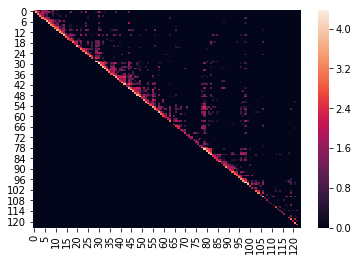

In [24]:
plot_relation('data/input/skill_builder_data_corrected.pickle', 124)